In [11]:
from sklearn.datasets import make_circles
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [42]:
def plot_decision_boundary(ax, clf, X, y, title=""):

    #Create mesh grid 
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

    #Generate a grid of points 
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    Z = clf.predict(np.stack([xx.ravel(), yy.ravel()], axis=1))
    Z = Z.reshape(xx.shape) 

    acc = clf.score(X,y)
    
    ax.contourf(xx, yy, Z, cmap='bwr', alpha = 0.4)
    ax.scatter(X[:,0], X[:,1], c=y, cmap='bwr')
    
    ax.set_title(f"SVM{title} Acc{acc}")
    

In [43]:
def make_circles_data():
    X, y = make_circles(n_samples = 100, 
                        factor = 0.5, 
                        noise = 0.05, 
                        random_state = 42)
    return X, y

In [44]:
def circles_demo():

    X, y = make_circles_data()

    #Different SVM Kernels
    kernels = [
        ("Linear", 'linear'),
        ("Polynomial", 'poly'),
        ("RBF", 'rbf'),
        ("Sigmoid", 'sigmoid')
    ]

    fig, axes = plt.subplots(2,2,figsize=(10,10))
  
    for ax, (name, ker) in zip(axes.flatten(), kernels):
        svm = SVC(kernel=ker)
        svm.fit(X, y)
        plot_decision_boundary(ax, svm, X, y, f"SVM({name})")

    plt.suptitle("SVM Kernel Comparision on Circles Data",
               fontsize = 14, fontweight ='bold')
    plt.show()
        
    

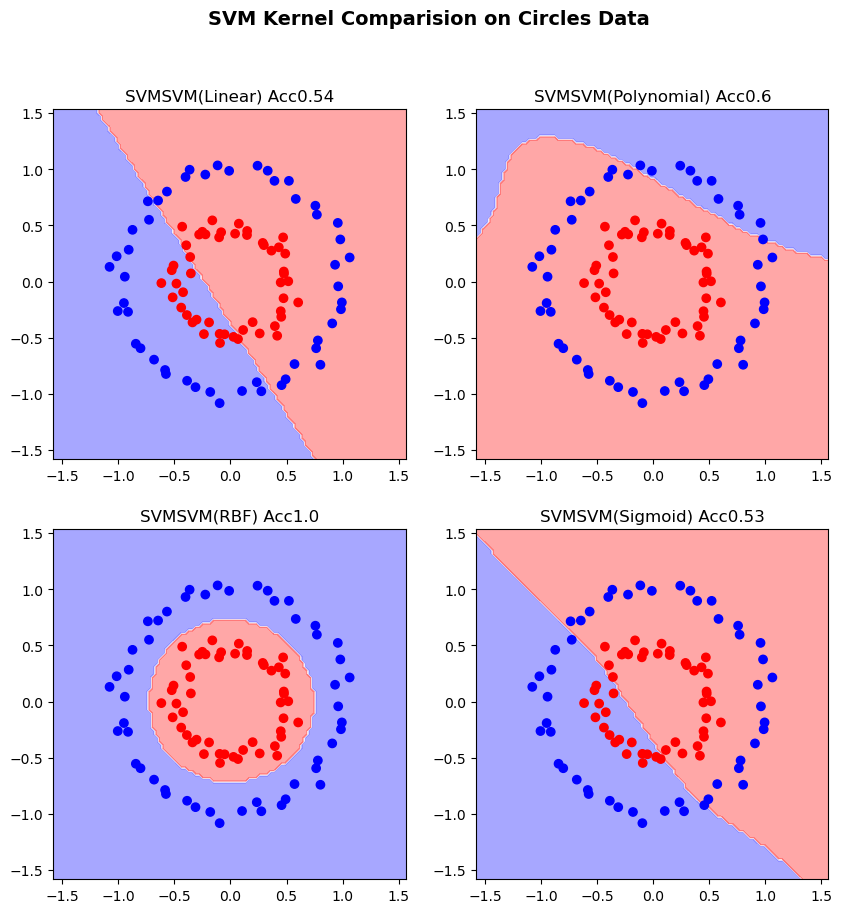

In [45]:
circles_demo()